In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
dataframed = pd.read_csv('final_test.csv')
dataframed.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


# The Dataset consist of the following :
* 119734 rows 
* 4 columns

In [5]:
print('Shape of the Dataset =', dataframed.shape)

Shape of the Dataset = (119734, 4)


# METADATA 
1. **Weight (in kgs) :**  Weight refers to the measurement of the amount of mass or heaviness of an object or a person. It is commonly expressed in kilograms (kg) in the metric system.

2. **Age :** Age refers to the length of time a person has been alive, measured in years. It is an important factor in various aspects of life, including development, growth, legal rights, and social interactions. Age is often used to categorize individuals into different age groups for statistical, medical, and legal purposes.

3. **Height (in cm) :** Height refers to the vertical measurement of an object or a person from the base to the top. It is commonly expressed in centimeters (cm) or feet and inches. When referring to a person's height, it typically indicates the distance from the ground to the top of their head, while standing upright.

4. **Size :**  Size can have different meanings depending on the context. In the context of clothing, size typically refers to the measurement or designation that indicates the fit of a garment. Clothing sizes can vary depending on the brand, country, and type of clothing item. In the context of this dataset here are the following sizes from smallest to largest : 
      * **XXS** = extra-extra-small
      * **S** = small, 
      * **M** = medium, 
      * **L** = large, 
      * **XL** = extra-large, 
      * **XXL** = extra-extra-large, 
      * **XXXL** = extra-extra-extra-large

In [6]:
dataframed.columns.values.tolist()

['weight', 'age', 'height', 'size']

In [7]:
dataframed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [8]:
dataframed.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [9]:
dataframed.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

In [10]:
dataframed.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

# Columns with missing values :

1. Age : Age refers to the length of time a person has been alive, measured in years. It is an important factor in various aspects of life, including development, growth, legal rights, and social interactions. Age is often used to categorize individuals into different age groups for statistical, medical, and legal purposes.

2. Height (in cm) : Height refers to the vertical measurement of an object or a person from the base to the top. It is commonly expressed in centimeters (cm) or feet and inches. When referring to a person's height, it typically indicates the distance from the ground to the top of their head, while standing upright.



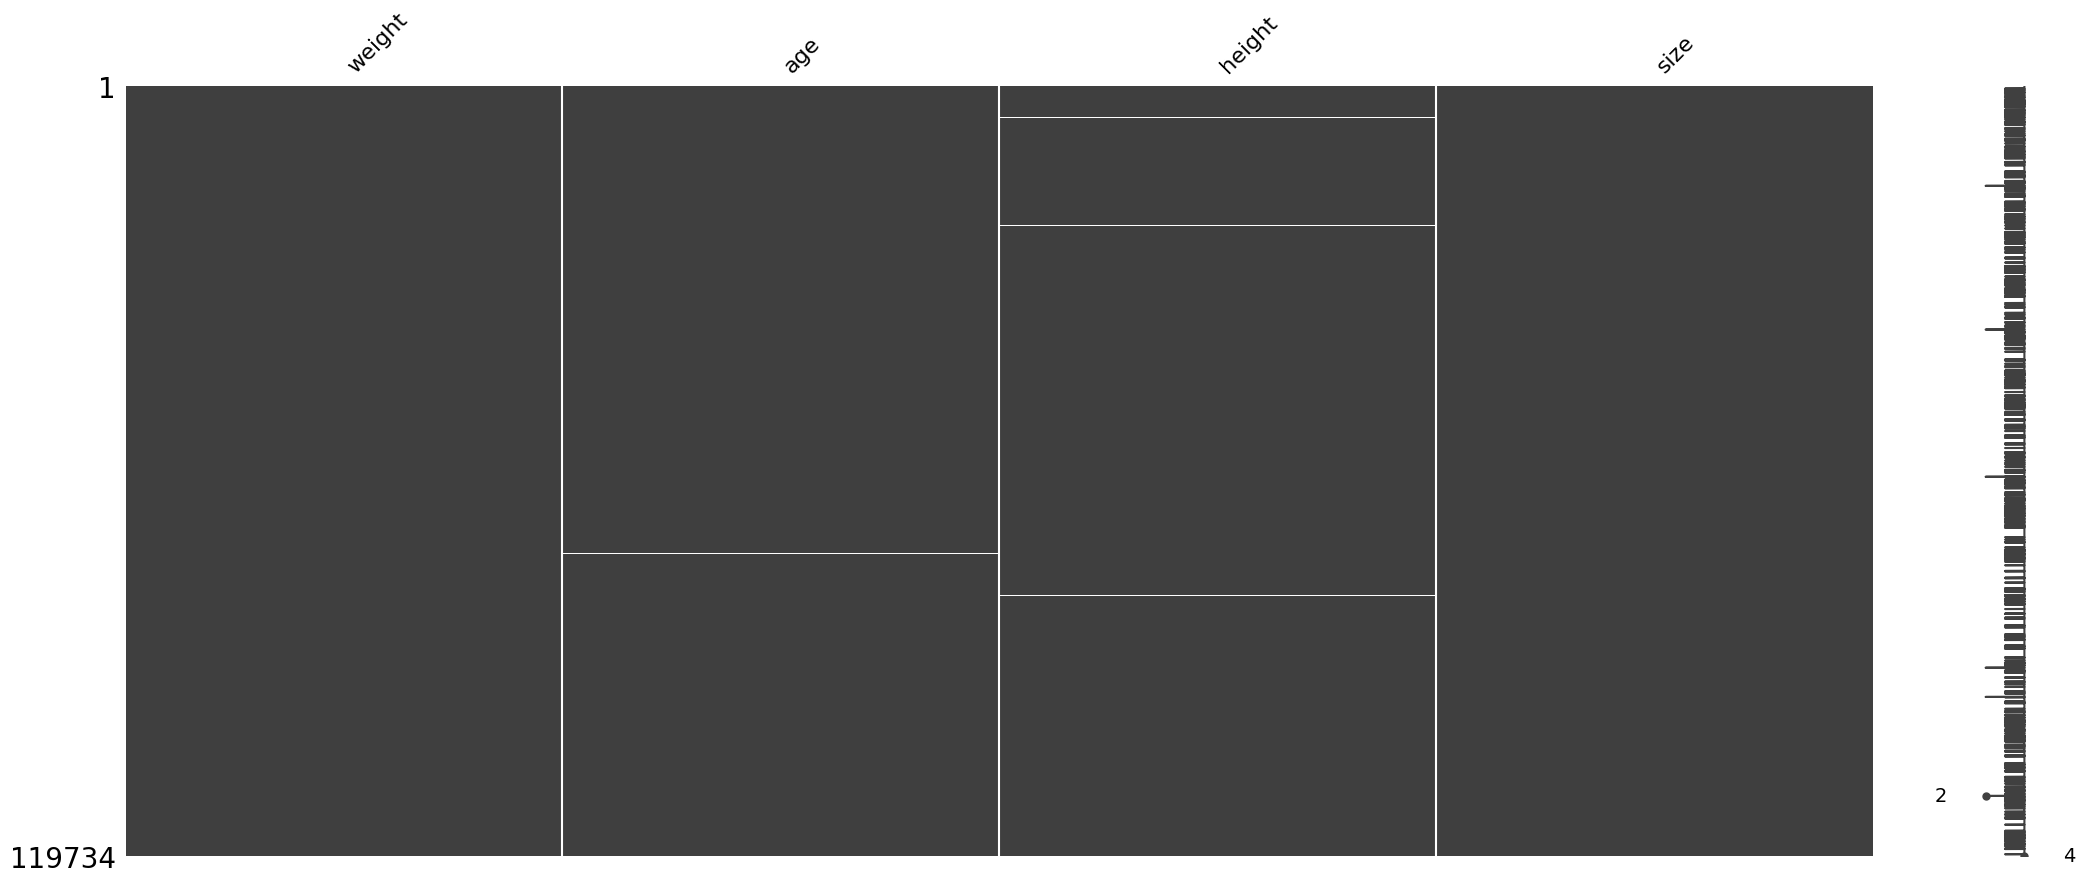

In [11]:
import missingno as msno
msno.matrix(dataframed)
plt.show()

# Missing Values : Age
Age refers to the length of time a person has been alive, measured in years. It is an important factor in various aspects of life, including development, growth, legal rights, and social interactions. Age is often used to categorize individuals into different age groups for statistical, medical, and legal purposes.

In [12]:
dataframed['age'] = dataframed['age'].fillna(dataframed['age'].median())

# Missing Values : Height (in cm)
Height refers to the vertical measurement of an object or a person from the base to the top. It is commonly expressed in centimeters (cm) or feet and inches. When referring to a person's height, it typically indicates the distance from the ground to the top of their head, while standing upright.

In [13]:
dataframed['height'] = dataframed['height'].fillna(dataframed['height'].median())

# Mapping Values : Size
Size can have different meanings depending on the context. In the context of clothing, size typically refers to the measurement or designation that indicates the fit of a garment. Clothing sizes can vary depending on the brand, country, and type of clothing item. In the context of this dataset here are the following sizes from smallest to largest : 
   * **XXS** = extra-extra-small = 1
   * **S** = small = 2
   * **M** = medium = 3 
   * **L** = large = 4 
   * **XL** = extra-large = 5 
   * **XXL** = extra-extra-large = 6 
   * **XXXL** = extra-extra-extra-large = 7

In [14]:
dataframed['size'] = dataframed['size'].map({"XXS": 1, "S": 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

# Feature Engineering

Columns we will create :
* **Body Mass Index (BMI) :**  Body Mass Index (BMI) is a numerical value calculated based on a person's weight and height. It is a widely used metric to assess whether an individual's weight is within a healthy range relative to their height. The BMI calculation provides a general indication of body composition and is often used as a screening tool to identify potential weight-related health risks.

The formula for calculating BMI is as follows:

> BMI = weight (in kilograms) / (height (in meters))^2

Alternatively, for height measured in centimeters, the formula can be modified as:

> BMI = weight (in kilograms) / (height (in centimeters) / 100)^2

Once the BMI is calculated, it is categorized into different ranges that correspond to varying degrees of weight status. The World Health Organization (WHO) classification commonly used for adults is as follows:

* Underweight: BMI less than 18.5
* Normal weight: BMI between 18.5 and 24.9
* Overweight: BMI between 25 and 29.9
* Obesity (Class I): BMI between 30 and 34.9
* Obesity (Class II): BMI between 35 and 39.9
* Obesity (Class III): BMI 40 or higher

In [15]:
dataframed['bmi'] = dataframed['weight'] / (pow(dataframed['height'] / 100, 2))

# EDA
**Types of Rows :**
* Overall Clothing Size Samples
* XXS Clothing Size Samples
* S Clothing Size Samples
* M Clothing Size Samples
* L Clothing Size Samples
* XL Clothing Size Samples
* XXL Clothing Size Samples
* XXXL Clothing Size Samples

# Imputation of Values : Median

In [16]:
dataframed["age"] = dataframed["age"].fillna(dataframed['age'].median())
dataframed["height"] = dataframed["height"].fillna(dataframed['height'].median())
dataframed["weight"] = dataframed["weight"].fillna(dataframed['weight'].median())

# Update BMI Values

In [17]:
dataframed["bmi"] = dataframed["height"]/dataframed["weight"]

# Last Call : Check for null values

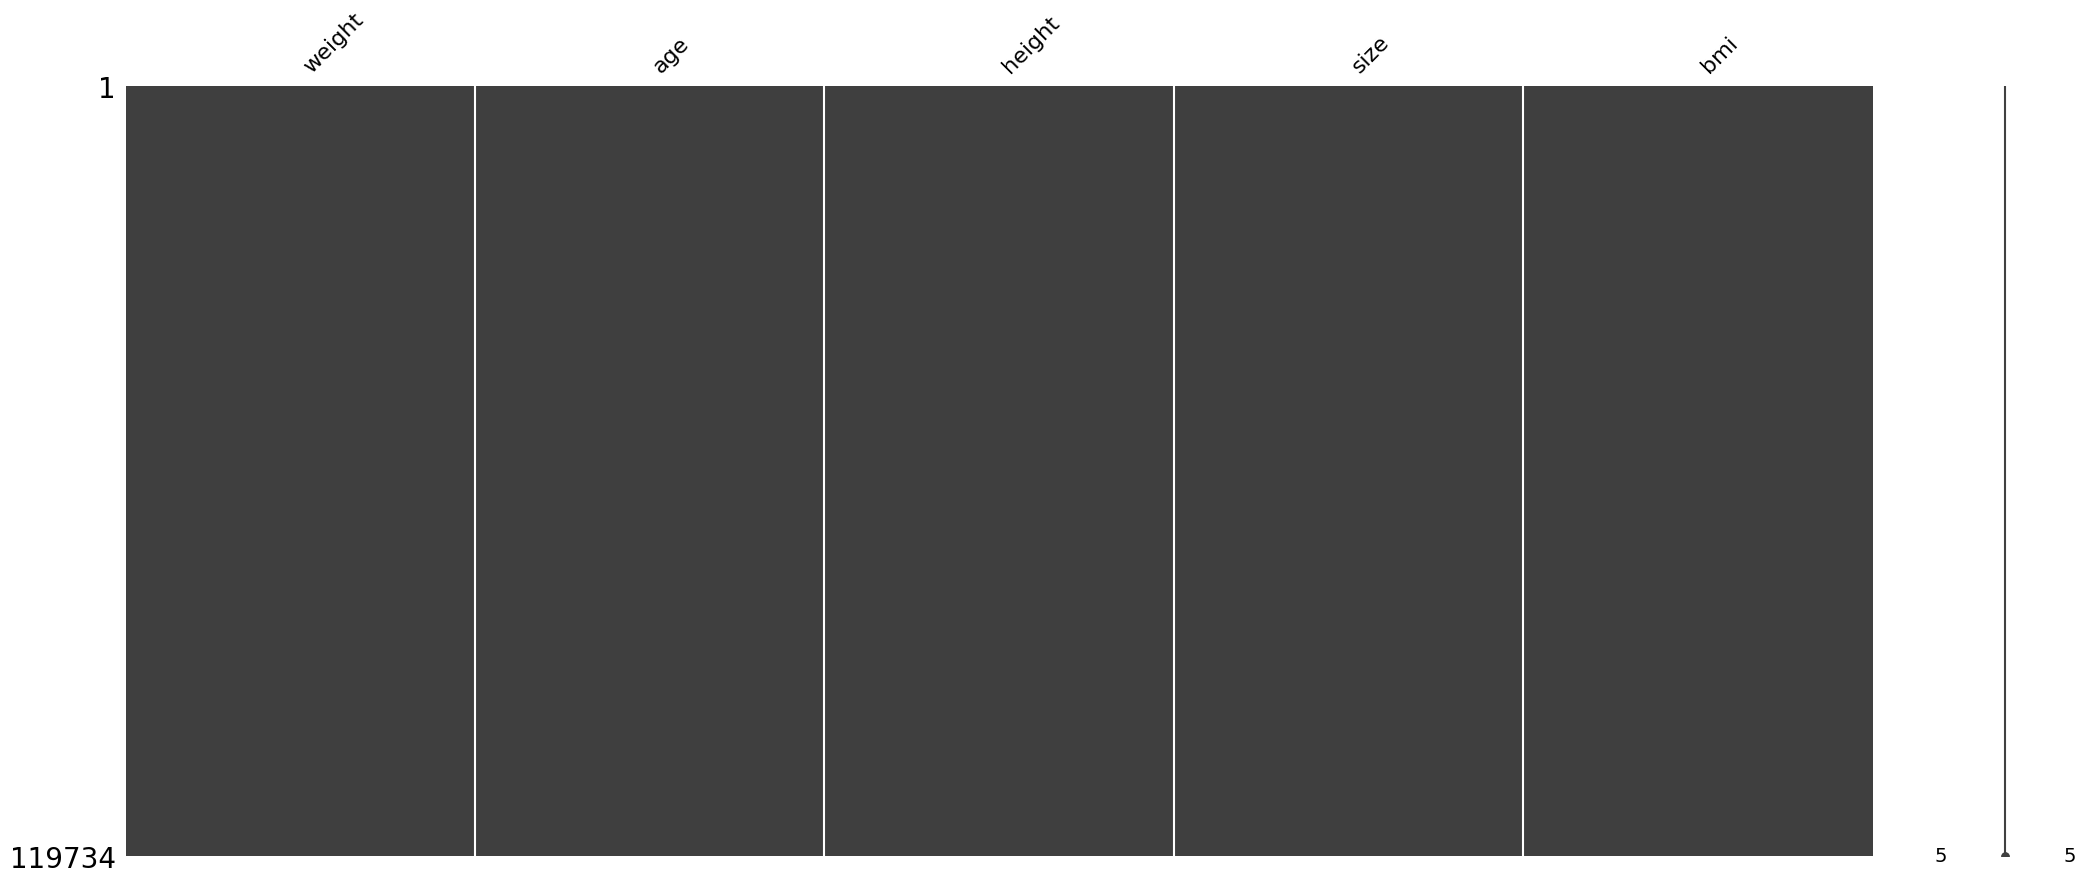

In [18]:
msno.matrix(dataframed)
plt.show()

# Defining X

Should contain the following :

* Weight
* Age
* Height
* BMI

In [19]:
X = dataframed['weight', 'age', 'height', 'bmi']
X.head()

,weight,age,height,bmi
0,62,28.0,172.72,2.785806
1,59,36.0,167.64,2.841356
2,61,34.0,165.10,2.706557
3,65,27.0,175.26,2.696308
4,62,45.0,172.72,2.785806


# Defining y

Should contain the following :
* Size

In [20]:
y = dataframed[['size']]
y.head()

,size
0,5
1,4
2,3
3,4
4,3


# Training and Testing

Supervised AL used :

* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Logistic Regression
* Gaussian Naive Bayes
* Quadratic Discriminant Analysis
* Cat Boost Classifier
* Extra Trees Classifier
* Light Gradient Boosting Machine
* Gradient Boosting Classifier
* Linear Discriminant Analysis
* Ada Boost Classifier
* Ridge Classifier

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# Split The Data for Training and Testing Purposes
Test Sizes
* 20%
* 30%

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Shape of Data (20%)

In [23]:
print("Shape of Data (20%)")
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

Shape of Data (20%)
X_train shape :  (95787, 4)
y_train shape :  (95787, 1)
X_test shape :  (23947, 4)
y_test shape :  (23947, 1)


# AL : K-Nearest Neighbors (20%)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import pickle
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)

# knnPickle = open('knnpickle_file', 'wb') 
# pickle.dump(knn, knnPickle) 
# knnPickle.close()

input = [53, 32.0, 32.26, 2.696308]
input = np.array(input)
# new_predictions = knn.predict(input.reshape(1,-1))

loaded_model = pickle.load(open('knnpickle_file', 'rb'))
result = loaded_model.predict(input.reshape(1,-1))
print(result)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

# print('AL : K-Nearest Neighbors (20%)')
# print('\n')
# print('Training Model Performance Check')
# print('Accuracy Score : {:.4f}'.format(raining_accuracy))
# print('F1 Score : {:.4f}'.format(training_f1))
# print('Precision Score : {:.4f}'.format(training_precision))
# print('Recall Score : {:.4f}'.format(training_recall))

# print('\n')
# print('Testing Model Performance Check')
# print('Accuracy Score : {:.4f}'.format(testing_accuracy))
# print('F1 Score : {:.4f}'.format(testing_f1))
# print('Precision Score : {:.4f}'.format(testing_precision))
# print('Recall Score : {:.4f}'.format(testing_recall))

NameError: name 'X_train' is not defined

# AL : Decision Tree (20%) 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

'''
# Visualize Decision Tree
# Note : I have decided to not include the visualization of the said decision tree due to its depth making it hard to visualize
plt.figure(figsize = (25,20))
tree.plot_tree(Decision_Tree,
               feature_names =  dataframed.columns.tolist()[:-1],
               class_names = ['1', '2', '3', '4', '5', '6', '7'],
               filled = True,
               precision = 5)
plt.show()
'''

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Decision Tree (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Decision Tree (20%)


Training Model Performance Check
Accuracy Score 0.5909
F1 Score 0.5881
Precision Score 0.5923
Recall Score 0.5909


Testing Model Performance Check
Accuracy Score 0.5085
F1 Score 0.5041
Precision Score 0.5070
Recall Score : 0.5085


# AL: Random Forest (20%)

In [29]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics 
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Random Forest (20%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))
      

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

AL : Random Forest (20%)


Training Model Performance Check
Accuracy Score : 0.5909
F1 Score : 0.5874
Precision Score : 0.5908
Recall Score : 0.5909


Testing Model Performance Check
Accuracy Score : 0.5102
F1 Score : 0.5051
Precision Score : 0.5070
Recall Score : 0.5102


# AL : Logistic Regression (20%)

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train.values.ravel())
training_prediction = Logistic_Regression.predict(X_train)
testing_prediction = Logistic_Regression.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Logistic Regression (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Gaussian Naive Bayes (20%)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gaussian Naive Bayes (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Quadratic Discriminant Analysis (20%)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train.values.ravel())
training_prediction = QDA.predict(X_train)
testing_prediction = QDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Quadratic Discriminant Analysis (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Cat Boost Classifier (20%)

In [ ]:
from catboost import CatBoostClassifier
print('Results log : ')
print('\n')

CAT = CatBoostClassifier()
CAT.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('AL : Cat Boost Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Extra Trees Classifier (20%)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Extra Trees Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Light Gradient Boosting Machine (20%)

In [ ]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train.values.ravel())
training_prediction = LGBM.predict(X_train)
testing_prediction = LGBM.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Light Gradient Boosting Machine (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Gradient Boosting Classifier (20%)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train.values.ravel())
training_prediction = GBC.predict(X_train)
testing_prediction = GBC.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gradient Boosting Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Linear Discriminant Analysis (20%)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train.values.ravel())
training_prediction = LDA.predict(X_train)
testing_prediction = LDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Linear Discriminant Analysis (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Ada Boost Classifier (20%)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train.values.ravel())
training_prediction = ADA.predict(X_train)
testing_prediction = ADA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Ada Boost Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Ridge Classifier (20%)

In [ ]:
from sklearn.linear_model import RidgeClassifier
Ridge = RidgeClassifier()
Ridge.fit(X_train, y_train.values.ravel())
training_prediction = Ridge.predict(X_train)
testing_prediction = Ridge.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL  Ridge Classifier (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Shape of Data (30%)

In [ ]:
print('Shape of Data (30%)')
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)

# AL : K-Nearest Neighbors (30%)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train.values.ravel())
training_prediction = knn.predict(X_train)
testing_prediction = knn.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : K-Nearest Neighbors (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Decision Tree (30%)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
training_prediction = Decision_Tree.predict(X_train)
testing_prediction = Decision_Tree.predict(X_test)

'''
# Visualize Decision Tree
# Note : I have decided to not include the visualization of the said decision tree due to its depth making it hard to visualize
plt.figure(figsize = (25,20))
tree.plot_tree(Decision_Tree,
               feature_names =  dataframed.columns.tolist()[:-1],
               class_names = ['1', '2', '3', '4', '5', '6', '7'],
               filled = True,
               precision = 5)
plt.show()
'''

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('AL : Decision Tree (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score {:.4f}'.format(training_accuracy))
print('F1 Score {:.4f}'.format(training_f1))
print('Precision Score {:.4f}'.format(training_precision))
print('Recall Score {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score {:.4f}'.format(testing_accuracy))
print('F1 Score {:.4f}'.format(testing_f1))
print('Precision Score {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Random Forest (30%)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train.values.ravel())
training_prediction = Random_Forest.predict(X_train)
testing_prediction = Random_Forest.predict(X_test)

#Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

#Testing Metrics 
testing_accuracy = accuracy_score(y_test, testing_prediction)
testing_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
testing_precision = precision_score(y_test, testing_prediction, average = 'weighted')
testing_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Random Forest (30%)')
print('\n')
print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))
      

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Logistic Regression (30%)

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train, y_train.values.ravel())
training_prediction = Logistic_Regression.predict(X_train)
testing_prediction = Logistic_Regression.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Logistic Regression (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Gaussian Naive Bayes (30%)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())
training_prediction = NB.predict(X_train)
testing_prediction = NB.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gaussian Naive Bayes (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Quadratic Discriminant Analysis (30%)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train.values.ravel())
training_prediction = QDA.predict(X_train)
testing_prediction = QDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Quadratic Discriminant Analysis (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Cat Boost Classifier (30%)

In [ ]:
from catboost import CatBoostClassifier
print('Results log : ')
print('\n')

CAT = CatBoostClassifier()
CAT.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')

print('\n')
print('AL : Cat Boost Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Extra Trees Classifier (30%)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train.values.ravel())
training_prediction = CAT.predict(X_train)
testing_prediction = CAT.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Extra Trees Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Light Gradient Boosting Machine (30%)

In [ ]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train.values.ravel())
training_prediction = LGBM.predict(X_train)
testing_prediction = LGBM.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Light Gradient Boosting Machine (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Gradient Boosting Classifier (30%)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train.values.ravel())
training_prediction = GBC.predict(X_train)
testing_prediction = GBC.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Gradient Boosting Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Extreme Gradient Boosting (30%)

# AL : Linear Discriminant Analysis (30%)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train.values.ravel())
training_prediction = LDA.predict(X_train)
testing_prediction = LDA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Linear Discriminant Analysis (20%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Ada Boost Classifier (30%)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train.values.ravel())
training_prediction = ADA.predict(X_train)
testing_prediction = ADA.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL : Ada Boost Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))

# AL : Ridge Classifier (30%)

In [ ]:
from sklearn.linear_model import RidgeClassifier
Ridge = RidgeClassifier()
Ridge.fit(X_train, y_train.values.ravel())
training_prediction = Ridge.predict(X_train)
testing_prediction = Ridge.predict(X_test)

# Training Metrics
training_accuracy = accuracy_score(y_train, training_prediction)
training_f1 = f1_score(y_train, training_prediction, average = 'weighted')
training_precision = precision_score(y_train, training_prediction, average = 'weighted')
training_recall = recall_score(y_train, training_prediction, average = 'weighted')

# Testing Metrics

testing_accuracy = accuracy_score(y_test, testing_prediction)
training_f1 = f1_score(y_test, testing_prediction, average = 'weighted')
training_precision = precision_score(y_test, testing_prediction, average = 'weighted')
training_recall = recall_score(y_test, testing_prediction, average = 'weighted')


print('AL  Ridge Classifier (30%)')
print('\n')

print('Training Model Performance Check')
print('Accuracy Score : {:.4f}'.format(training_accuracy))
print('F1 Score : {:.4f}'.format(training_f1))
print('Precision Score : {:.4f}'.format(training_precision))
print('Recall Score : {:.4f}'.format(training_recall))

print('\n')
print('Testing Model Performance Check')
print('Accuracy Score : {:.4f}'.format(testing_accuracy))
print('F1 Score : {:.4f}'.format(testing_f1))
print('Precision Score : {:.4f}'.format(testing_precision))
print('Recall Score : {:.4f}'.format(testing_recall))